# Robot Motion Path Planning Using Potential Field Method

This notebook demonstrates how to plan a path for a robot from a start to a goal position while avoiding obstacles using the **Potential Field Method**.

### Method Overview
- **Attractive Potential** pulls the robot toward the goal.
- **Repulsive Potential** pushes the robot away from obstacles.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Workspace and Parameters
grid_size = (100, 100)  # 2D workspace dimensions
start = np.array([10, 10], dtype=float)
goal = np.array([90, 90], dtype=float)
obstacles = [np.array([40, 40]), np.array([80, 40]), np.array([60, 55]), np.array([55, 60])]

# Parameters
k_att = 1.0          # Attractive gain
k_rep = 500.0        # Repulsive gain
d0 = 60              # Influence distance of obstacles
step_size = 0.5      # Movement step size
tolerance = 2.0      # Goal tolerance

In [3]:
# Attractive Potential and Force
def attractive_potential(q, goal):
    return 0.5 * k_att * np.linalg.norm(q - goal) ** 2

def attractive_force(q, goal):
    return -k_att * (q - goal)

# Repulsive Potential and Force
def repulsive_potential(q, obstacles):
    U_rep = 0
    for obs in obstacles:
        d = np.linalg.norm(q - obs)
        if d <= d0:
            U_rep += 0.5 * k_rep * ((1.0 / d - 1.0 / d0) ** 2)
    return U_rep

def repulsive_force(q, obstacles):
    F_rep = np.zeros(2)
    for obs in obstacles:
        d = np.linalg.norm(q - obs)
        if d <= d0 and d != 0:
            F_rep += k_rep * ((1.0 / d - 1.0 / d0) / (d ** 3)) * (q - obs)
    return F_rep


### Path Planning Function

The function plan_path() computes the robot's path from start to goal using the attractive and repulsive forces.

The path is recorded step-by-step until the robot reaches within a tolerance of the goal.


In [4]:
def plan_path(start, goal, obstacles):
    path = [start.copy()]
    current_pos = start.copy()
    max_iters = 10000
    for _ in range(max_iters):
        F_att = attractive_force(current_pos, goal)
        F_rep = repulsive_force(current_pos, obstacles)
        F_total = F_att + F_rep

        # Avoid getting stuck in local minima
        if np.linalg.norm(F_total) < 1e-3:
            print("Stuck in local minimum, applying perturbation...")
            F_total = np.random.uniform(-1, 1, size=2) * 10

        # Normalize and step
        direction = F_total / np.linalg.norm(F_total)
        current_pos += step_size * direction
        path.append(current_pos.copy())

        if np.linalg.norm(current_pos - goal) < tolerance:
            break

    return np.array(path)


In [5]:
# Run path planning
path = plan_path(start, goal, obstacles)

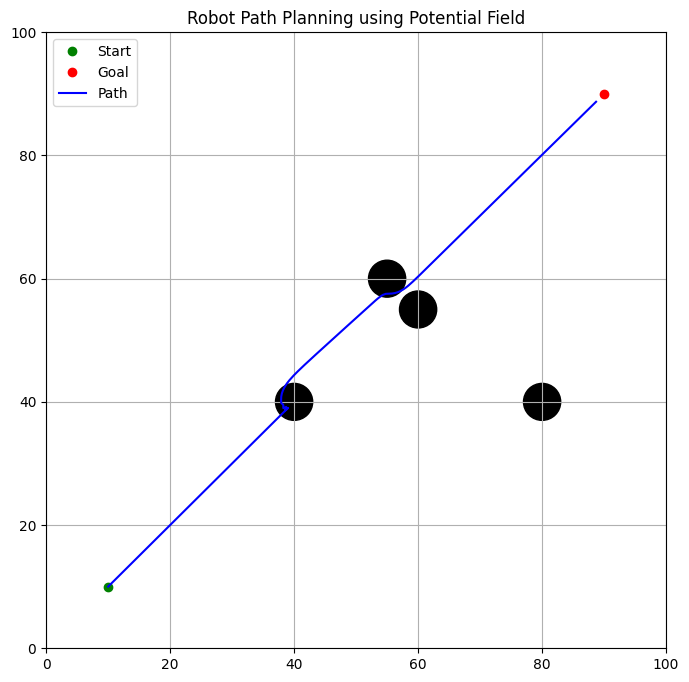

In [11]:
def visualize(path, start, goal, obstacles):
    plt.figure(figsize=(8, 8))
    plt.xlim(0, grid_size[0])
    plt.ylim(0, grid_size[1])

    # Plot obstacles
    for obs in obstacles:
        circle = plt.Circle(obs, radius=3, color='black')
        plt.gca().add_patch(circle)

    # Plot start, goal, and path
    plt.plot(start[0], start[1], 'go', label='Start')
    plt.plot(goal[0], goal[1], 'ro', label='Goal')
    plt.plot(path[:, 0], path[:, 1], 'b-', label='Path')
    plt.legend()
    plt.grid(True)
    plt.title("Robot Path Planning using Potential Field")
    plt.show()

visualize(path, start, goal, obstacles)

## Final Notes

- Parameters `k_rep`, `step_size`, and `d0` are tunable to improve path smoothness and safety.
- If the robot gets too close to an obstacle, repulsion can be increased or step size decreased.
